# FFT Derivatives Exercise

### Packages

In [1]:
import numpy
import seaborn as sns
import matplotlib.pyplot as plt

### Settings

In [2]:
sns.set_style("darkgrid")

%pylab inline
pylab.rcParams['figure.figsize'] = (12, 4)

Populating the interactive namespace from numpy and matplotlib


### Parameters

In [3]:
t0 = 2*numpy.pi
t1 = 8*numpy.pi

size = 200
t = numpy.linspace(t0, t1, num = size)

#Just to cut extremes while plot
cutoff = numpy.int(0.05*size)

### Functions

In [4]:
f1 = numpy.cos(t)
f2 = 3*numpy.square(t) + t
f3 = numpy.log(t)

### Compute Derivatives

#### Analytical Method

In [5]:
#1st derivative
f1_deriv1 = -1 * numpy.sin(t)
f2_deriv1 = 6*t + 1
f3_deriv1 = numpy.divide(1, t)

#2nd derivative
f1_deriv2 = -1 * numpy.cos(t)
f2_deriv2 =  6 * numpy.ones(len(t))
f3_deriv2 = -1 * numpy.divide(1, t ** t)

#### Fourier Method

In [6]:
#Step1) Compute Fourier transform
f1_ft = numpy.fft.fft(f1)
f2_ft = numpy.fft.fft(f2)
f3_ft = numpy.fft.fft(f3)

freq = numpy.fft.fftfreq(len(t), (t1-t0)/len(t))

#Step2) Compute derivative of fourier transform

#1st derivative
f1_deriv1_ft = numpy.multiply(numpy.multiply(2*numpy.pi*numpy.complex(0, 1), freq), f1_ft)
f2_deriv1_ft = numpy.multiply(numpy.multiply(2*numpy.pi*numpy.complex(0, 1), freq), f2_ft)
f3_deriv1_ft = numpy.multiply(numpy.multiply(2*numpy.pi*numpy.complex(0, 1), freq), f3_ft)

#2nd derivative
f1_deriv2_ft = numpy.multiply(numpy.power(numpy.multiply(2*numpy.pi*numpy.complex(0, 1), freq), 2), f1_ft)
f2_deriv2_ft = numpy.multiply(numpy.power(numpy.multiply(2*numpy.pi*numpy.complex(0, 1), freq), 2), f2_ft)
f3_deriv2_ft = numpy.multiply(numpy.power(numpy.multiply(2*numpy.pi*numpy.complex(0, 1), freq), 2), f3_ft)

#Step3) Compute the inverse of derivative fourier transform

#1st derivative
f1_deriv1_ft_inv = numpy.fft.ifft(f1_deriv1_ft).real
f2_deriv1_ft_inv = numpy.fft.ifft(f2_deriv1_ft).real
f3_deriv1_ft_inv = numpy.fft.ifft(f3_deriv1_ft).real

#2nd derivative
f1_deriv2_ft_inv = numpy.fft.ifft(f1_deriv2_ft).real
f2_deriv2_ft_inv = numpy.fft.ifft(f2_deriv2_ft).real
f3_deriv2_ft_inv = numpy.fft.ifft(f3_deriv2_ft).real

### Compute Errors

#### 1st derivatives

In [7]:
#1st derivative errors
f1_deriv1_error = sum(numpy.square(numpy.subtract(f1_deriv1, f1_deriv1_ft_inv)))
f2_deriv1_error = sum(numpy.square(numpy.subtract(f2_deriv1, f2_deriv1_ft_inv)))
f3_deriv1_error = sum(numpy.square(numpy.subtract(f3_deriv1, f3_deriv1_ft_inv)))
print([f1_deriv1_error, f2_deriv1_error, f3_deriv1_error])

[0.0029728318036825714, 503610299.69280016, 301.31806714224103]


#### 2nd derivatives

In [8]:
#2nd derivative errors
f1_deriv2_error = sum(numpy.square(numpy.subtract(f1_deriv2, f1_deriv2_ft_inv)))
f2_deriv2_error = sum(numpy.square(numpy.subtract(f2_deriv2, f2_deriv2_ft_inv)))
f3_deriv2_error = sum(numpy.square(numpy.subtract(f3_deriv2, f3_deriv2_ft_inv)))
print([f1_deriv2_error, f2_deriv2_error, f3_deriv2_error])

[0.65349778649984858, 236372405206.70105, 141420.30704622949]


### Generate Plots

#### f1

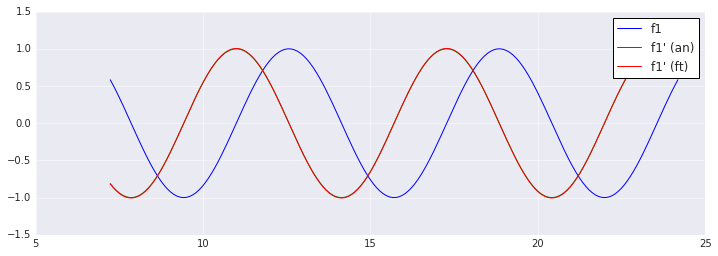

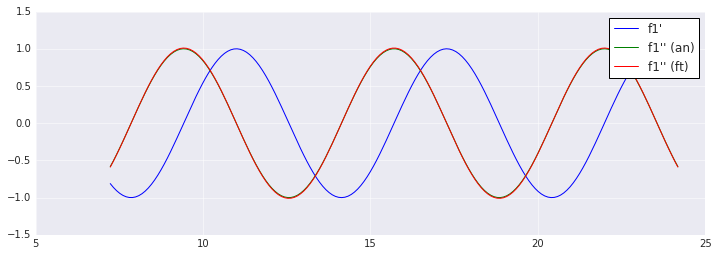

In [9]:
#f1 plot (f1 and f1-1st derivative)
plt.plot(t[cutoff:-cutoff], f1[cutoff:-cutoff])
plt.plot(t[cutoff:-cutoff], f1_deriv1[cutoff:-cutoff])
plt.plot(t[cutoff:-cutoff], f1_deriv1_ft_inv[cutoff:-cutoff])
lg_frame = plt.legend(["f1", "f1' (an)", "f1' (ft)"], frameon = 1).get_frame()
lg_frame.set_color("white")
lg_frame.set_edgecolor("black")
plt.show()

#f1 plot (f1-1st and f2-2nd derivatives)
plt.plot(t[cutoff:-cutoff], f1_deriv1[cutoff:-cutoff])
plt.plot(t[cutoff:-cutoff], f1_deriv2[cutoff:-cutoff])
plt.plot(t[cutoff:-cutoff], f1_deriv2_ft_inv[cutoff:-cutoff])
lg_frame = plt.legend(["f1'", "f1'' (an)", "f1'' (ft)"], frameon = 1).get_frame()
lg_frame.set_color("white")
lg_frame.set_edgecolor("black")
plt.show()

#### f2

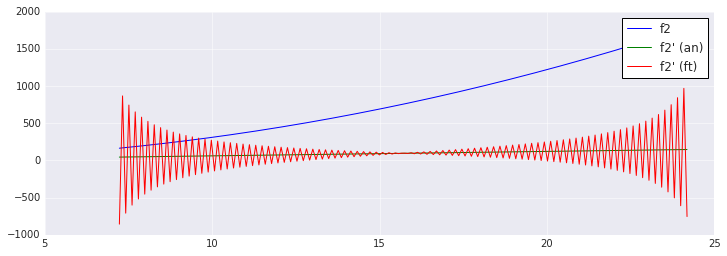

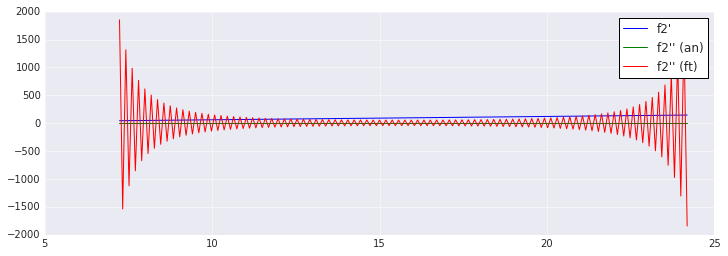

In [10]:
#f2 plot (f2 and f2-1st derivative)
plt.plot(t[cutoff:-cutoff], f2[cutoff:-cutoff])
plt.plot(t[cutoff:-cutoff], f2_deriv1[cutoff:-cutoff])
plt.plot(t[cutoff:-cutoff], f2_deriv1_ft_inv[cutoff:-cutoff])
lg_frame = plt.legend(["f2", "f2' (an)", "f2' (ft)"], frameon = 1).get_frame()
lg_frame.set_color("white")
lg_frame.set_edgecolor("black")
plt.show()

#f2 plot (f2-1st and f2-2nd derivatives)
plt.plot(t[cutoff:-cutoff], f2_deriv1[cutoff:-cutoff])
plt.plot(t[cutoff:-cutoff], f2_deriv2[cutoff:-cutoff])
plt.plot(t[cutoff:-cutoff], f2_deriv2_ft_inv[cutoff:-cutoff])
lg_frame = plt.legend(["f2'", "f2'' (an)", "f2'' (ft)"], frameon = 1).get_frame()
lg_frame.set_color("white")
lg_frame.set_edgecolor("black")
plt.show()

#### f3

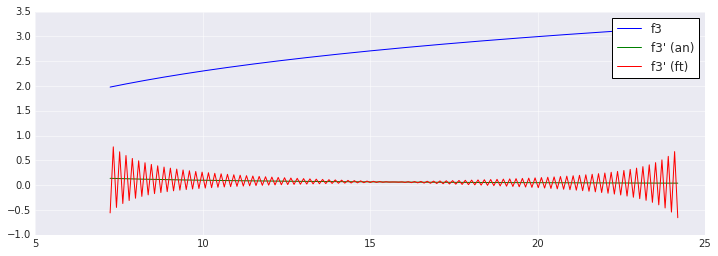

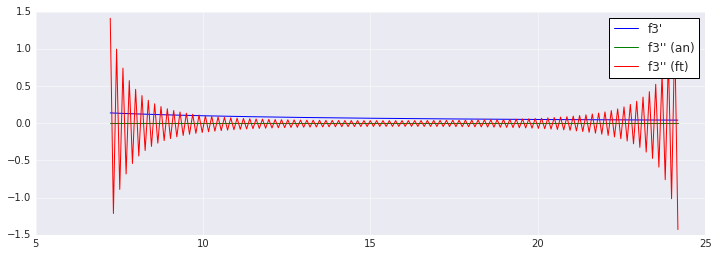

In [11]:
#f3 plot (f3 and f3-1st derivative)
plt.plot(t[cutoff:-cutoff], f3[cutoff:-cutoff])
plt.plot(t[cutoff:-cutoff], f3_deriv1[cutoff:-cutoff])
plt.plot(t[cutoff:-cutoff], f3_deriv1_ft_inv[cutoff:-cutoff])
lg_frame = plt.legend(["f3", "f3' (an)", "f3' (ft)"], frameon = 1).get_frame()
lg_frame.set_color("white")
lg_frame.set_edgecolor("black")
plt.show()

#f3 plot (f3-1st and f3-2nd derivatives)
plt.plot(t[cutoff:-cutoff], f3_deriv1[cutoff:-cutoff])
plt.plot(t[cutoff:-cutoff], f3_deriv2[cutoff:-cutoff])
plt.plot(t[cutoff:-cutoff], f3_deriv2_ft_inv[cutoff:-cutoff])
lg_frame = plt.legend(["f3'", "f3'' (an)", "f3'' (ft)"], frameon = 1).get_frame()
lg_frame.set_color("white")
lg_frame.set_edgecolor("black")
plt.show()